### Python for Statistical Analysis

Install the required libraries using the following commands:

In [4]:
pip install seaborn pandas numpy scipy scikit-learn statsmodels

Note: you may need to restart the kernel to use updated packages.


#### Sample Code for Statistical Analysis in Python

In [7]:
import pandas as pd

In [9]:
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the mental health Dataset

In [4]:
df=pd.read_csv("mental_health_and_technology_usage_2024.csv")

In [5]:
df.head()

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


#### Performing Descriptive Statistics

In [6]:
# Calculate mean for numeric columns only
numeric_df = df.select_dtypes(include=['number'])
print("Mean:\n", numeric_df.mean())
print("\nMedian:\n", numeric_df.median())
print("\nStandard Deviation:\n", numeric_df.std())
print("\nVariance:\n",numeric_df.var())
print("\nMin:\n", numeric_df.min())
print("\nMax:\n", numeric_df.max())
print("\nMode:\n",numeric_df.mode().iloc[0])

Mean:
 Age                         41.518600
Technology_Usage_Hours       6.474341
Social_Media_Usage_Hours     3.972321
Gaming_Hours                 2.515598
Screen_Time_Hours            7.975765
Sleep_Hours                  6.500724
Physical_Activity_Hours      5.003860
dtype: float64

Median:
 Age                         42.000
Technology_Usage_Hours       6.425
Social_Media_Usage_Hours     3.950
Gaming_Hours                 2.520
Screen_Time_Hours            7.900
Sleep_Hours                  6.500
Physical_Activity_Hours      4.990
dtype: float64

Standard Deviation:
 Age                         13.920217
Technology_Usage_Hours       3.169022
Social_Media_Usage_Hours     2.313707
Gaming_Hours                 1.446748
Screen_Time_Hours            4.042608
Sleep_Hours                  1.450933
Physical_Activity_Hours      2.905044
dtype: float64

Variance:
 Age                         193.772431
Technology_Usage_Hours       10.042703
Social_Media_Usage_Hours      5.353238
Gaming_Hou

In [7]:
# Additional descriptive statistics
print("\nRange:\n", numeric_df.max() - numeric_df.min())
print("\nSkewness:\n", numeric_df.skew())
print("\nKurtosis:\n", numeric_df.kurt())


Range:
 Age                         47.0
Technology_Usage_Hours      11.0
Social_Media_Usage_Hours     8.0
Gaming_Hours                 5.0
Screen_Time_Hours           14.0
Sleep_Hours                  5.0
Physical_Activity_Hours     10.0
dtype: float64

Skewness:
 Age                         0.005154
Technology_Usage_Hours      0.018047
Social_Media_Usage_Hours    0.010760
Gaming_Hours               -0.023540
Screen_Time_Hours           0.015484
Sleep_Hours                 0.004033
Physical_Activity_Hours     0.000612
dtype: float64

Kurtosis:
 Age                        -1.208393
Technology_Usage_Hours     -1.190780
Social_Media_Usage_Hours   -1.211233
Gaming_Hours               -1.205375
Screen_Time_Hours          -1.194322
Sleep_Hours                -1.212284
Physical_Activity_Hours    -1.211133
dtype: float64


In [8]:
# Strip any extra spaces from column names
df.columns = df.columns.str.strip()
# Check available columns and their data types
print("Available columns:", df.columns)
print("Data types:\n", df.dtypes)
# Check the first few rows
print(df.head())

# Safe column access
column_name = 'Score_Before'  # Replace with your column name

if column_name in df.columns:
    print(df[column_name])
else:
    print(f"Column '{column_name}' does not exist.")

Available columns: Index(['User_ID', 'Age', 'Gender', 'Technology_Usage_Hours',
       'Social_Media_Usage_Hours', 'Gaming_Hours', 'Screen_Time_Hours',
       'Mental_Health_Status', 'Stress_Level', 'Sleep_Hours',
       'Physical_Activity_Hours', 'Support_Systems_Access',
       'Work_Environment_Impact', 'Online_Support_Usage'],
      dtype='object')
Data types:
 User_ID                      object
Age                           int64
Gender                       object
Technology_Usage_Hours      float64
Social_Media_Usage_Hours    float64
Gaming_Hours                float64
Screen_Time_Hours           float64
Mental_Health_Status         object
Stress_Level                 object
Sleep_Hours                 float64
Physical_Activity_Hours     float64
Support_Systems_Access       object
Work_Environment_Impact      object
Online_Support_Usage         object
dtype: object
      User_ID  Age  Gender  Technology_Usage_Hours  Social_Media_Usage_Hours  \
0  USER-00001   23  Female        

In [9]:
print("Available columns:", df.columns)

Available columns: Index(['User_ID', 'Age', 'Gender', 'Technology_Usage_Hours',
       'Social_Media_Usage_Hours', 'Gaming_Hours', 'Screen_Time_Hours',
       'Mental_Health_Status', 'Stress_Level', 'Sleep_Hours',
       'Physical_Activity_Hours', 'Support_Systems_Access',
       'Work_Environment_Impact', 'Online_Support_Usage'],
      dtype='object')


##### Performing Inferential Statistics

In [10]:
from scipy import stats

# Example column names (replace with actual names from your dataset)
# Assume 'Tech_Use' is categorical ('Yes'/'No') and 'Mental_Health_Score' is numerical
tech_use_yes = df[df['Technology_Usage_Hours'] == 'Yes']['Mental_Health_Status']
tech_use_no = df[df['Technology_Usage_Hours'] == 'No']['Mental_Health_Status']

# Perform independent t-test
t_stat_ind, p_value_ind = stats.ttest_ind(tech_use_yes, tech_use_no, nan_policy='omit')
print(f"Independent T-test:\nT-statistic: {t_stat_ind}, p-value: {p_value_ind}")


Independent T-test:
T-statistic: nan, p-value: nan


##### Confidence Intervals

In [11]:

def confidence_interval(data, confidence=0.95):
    """Compute the confidence interval for the mean of the data."""
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data, nan_policy='omit')  # Standard Error of Mean
    h = sem * stats.t.ppf((1 + confidence) / 2., n - 1)  # Margin of Error
    return mean - h, mean + h

# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Dictionary to hold confidence intervals for each numerical column
ci_dict = {}

# Calculate confidence intervals for each numerical column
for column in numerical_columns:
    ci = confidence_interval(df[column])
    ci_dict[column] = ci

# Print the confidence intervals
for column, ci in ci_dict.items():
    print(f"Confidence Interval for {column}: {ci}")

Confidence Interval for Age: (41.24573573753896, 41.79146426246104)
Confidence Interval for Technology_Usage_Hours: (6.4122217826718275, 6.536460217328172)
Confidence Interval for Social_Media_Usage_Hours: (3.9269676931603876, 4.017674306839612)
Confidence Interval for Gaming_Hours: (2.487238817701077, 2.5439571822989224)
Confidence Interval for Screen_Time_Hours: (7.896521752038481, 8.055008247961517)
Confidence Interval for Sleep_Hours: (6.472282790392075, 6.529165209607923)
Confidence Interval for Physical_Activity_Hours: (4.946915292535763, 5.0608047074642375)


##### Regression Analysis

In [20]:
import statsmodels.api as sm
#df['Gaming_Hours']=np.asarray(df['Gaming_Hours'])#df['Mental_Health_Status']=np.asarray(df['Mental_Health_Status'])
# Define independent variable (add constant for intercept)
X=df['Gaming_Hours']
X = sm.add_constant(X)

# Define dependent variable
y = df['Sleep_Hours']

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Sleep_Hours   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.080
Date:                Thu, 12 Sep 2024   Prob (F-statistic):              0.299
Time:                        10:31:44   Log-Likelihood:                -17910.
No. Observations:               10000   AIC:                         3.582e+04
Df Residuals:                    9998   BIC:                         3.584e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.4745      0.029    222.458   

##### Visualizing the results:

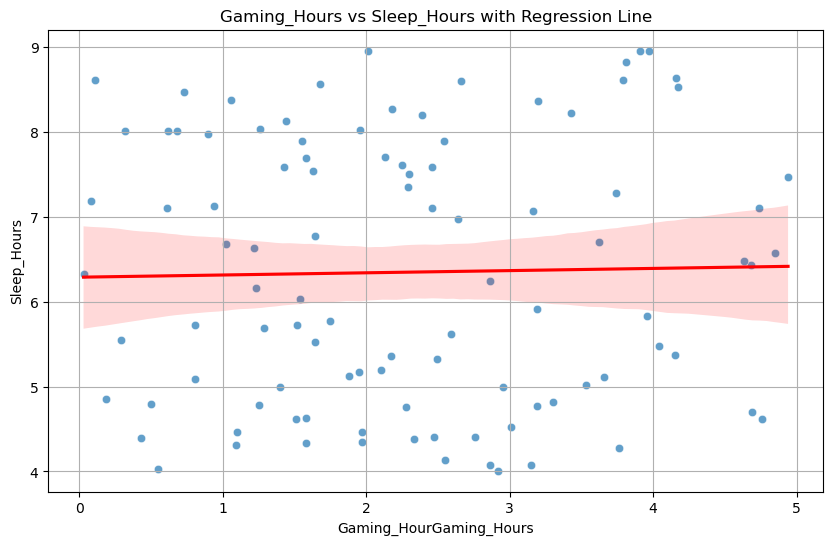

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot data and regression line
df2=df.head(100)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gaming_Hours', y='Sleep_Hours', data=df2, alpha=0.7)
sns.regplot(x='Gaming_Hours', y='Sleep_Hours', data=df2, scatter=False, color='red')

# Add labels and title
plt.xlabel('Gaming_HourGaming_Hours')
plt.ylabel('Sleep_Hours')
plt.title('Gaming_Hours vs Sleep_Hours with Regression Line')

# Show plot
plt.grid(True)
plt.show()